In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 8:2
df = pd.read_csv('VCB.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
# val_data = df[train_size+test_size:]

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.5 MB/s eta 0:00:00


In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23218.647, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23216.513, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23218.267, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23218.291, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23216.678, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23219.097, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.817 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [10]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

# 5. Quá trình Validate
# x_val= np.array(val_data.index).reshape(-1, 1)
# y_val = np.array(val_data['Price'])
# y_pred_val =  model.predict(n_periods=len(y_val))

In [11]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88337.20371694 88375.36669049 88413.52966404 88451.6926376
 88489.85561115 88528.0185847  88566.18155825 88604.34453181
 88642.50750536 88680.67047891 88718.83345247 88756.99642602
 88795.15939957 88833.32237312 88871.48534668 88909.64832023
 88947.81129378 88985.97426733 89024.13724089 89062.30021444
 89100.46318799 89138.62616154 89176.7891351  89214.95210865
 89253.1150822  89291.27805575 89329.44102931 89367.60400286
 89405.76697641 89443.92994996]


In [12]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)


RMSE: 7420.2384663046605


Testing RMSE: 7420.2384663046605
Mean Absolute Error (MAE): 5603.069821300621
Mean Absolute Percentage Error (MAPE): 7.3442695331662655


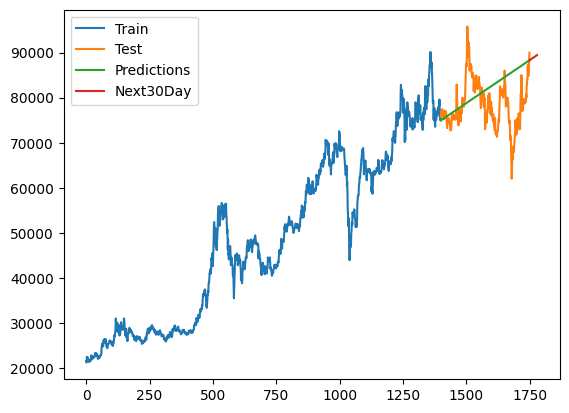

In [13]:
# 7. Tính RMSE, MAE, MSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))
print('Mean Absolute Error (MAE):', mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)


# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
# plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1225, stop=1575, step=1)

In [14]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 7:3
df1 = pd.read_csv('VCB.csv')
df1 = df1[['Price']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size1 = int(0.7 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]


In [15]:
# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model1 = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model1.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20000.255, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19999.777, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20001.692, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20001.702, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20000.935, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20003.571, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.995 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [18]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Price'])
y_pred1 = model.predict(n_periods=len(y_test1)+30)

In [19]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df1.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days1 = y_pred1[-30:]
y_pred1 = y_pred1[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days1)

Predicted closing prices for the next 30 days:
[95015.72408863 95053.88706219 95092.05003574 95130.21300929
 95168.37598284 95206.5389564  95244.70192995 95282.8649035
 95321.02787705 95359.19085061 95397.35382416 95435.51679771
 95473.67977126 95511.84274482 95550.00571837 95588.16869192
 95626.33166547 95664.49463903 95702.65761258 95740.82058613
 95778.98355968 95817.14653324 95855.30950679 95893.47248034
 95931.63545389 95969.79842745 96007.961401   96046.12437455
 96084.2873481  96122.45032166]


In [20]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

Testing RMSE: 10008.004748081801


Testing RMSE: 10008.004748081801
Mean Absolute Error (MAE): 7946.100651485157
Mean Absolute Percentage Error (MAPE): 10.429120789682909


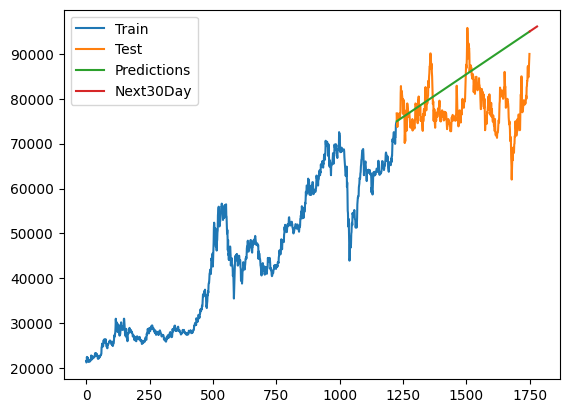

In [21]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

# Calculate MAE
mae1 = np.mean(np.abs(y_pred1 - y_test1))
print('Mean Absolute Error (MAE):', mae1)

# Calculate MAPE
mape1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape1)

# 8.Vẽ hình
plt.plot(train_data1.index, train_data1['Price'])
plt.plot(test_data1.index, test_data1['Price'])
plt.plot(test_data1.index, y_pred1)
plt.plot(last_data1,y_next_30_days1)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [22]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 9:1
df2 = pd.read_csv('VCB.csv')
df2 = df2[['Price']]
df2 = df2.dropna() # Drop missing values
df2 = df2.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size2 = int(0.9 * len(df2))
test_size2 = int(0.1 * len(df2))

train_data2 = df2[:train_size2]
test_data2 = df2[train_size2:train_size2+test_size2]


In [23]:
# 3. Quá trình Training
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model2 = auto_arima(y_train2, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model2.fit(y_train2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26248.616, Time=5.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26257.540, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26259.329, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26259.342, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26257.178, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26261.331, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26261.542, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26249.174, Time=4.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26248.592, Time=2.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26259.338, Time=1.01 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26250.037, Time=6.74 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26251.051, Time=4.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=26258.806, Time=1.37 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=26252.107, Time=7.51 sec
 ARIMA(2,1,3)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
# 4. Quá trình testing
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Price'])
y_pred2 = model.predict(n_periods=len(y_test2)+30)


In [25]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index2 =  df2.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days2 = y_pred2[-30:]
y_pred2 = y_pred2[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[81658.68334525 81696.8463188  81735.00929235 81773.1722659
 81811.33523946 81849.49821301 81887.66118656 81925.82416011
 81963.98713367 82002.15010722 82040.31308077 82078.47605432
 82116.63902788 82154.80200143 82192.96497498 82231.12794853
 82269.29092209 82307.45389564 82345.61686919 82383.77984274
 82421.9428163  82460.10578985 82498.2687634  82536.43173695
 82574.59471051 82612.75768406 82650.92065761 82689.08363116
 82727.24660472 82765.40957827]


In [26]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

Testing RMSE: 5132.256878401987


Testing RMSE: 5132.256878401987
Mean Absolute Error (MAE): 3979.2027366485545
Mean Absolute Percentage Error (MAPE): 5.356367730505182


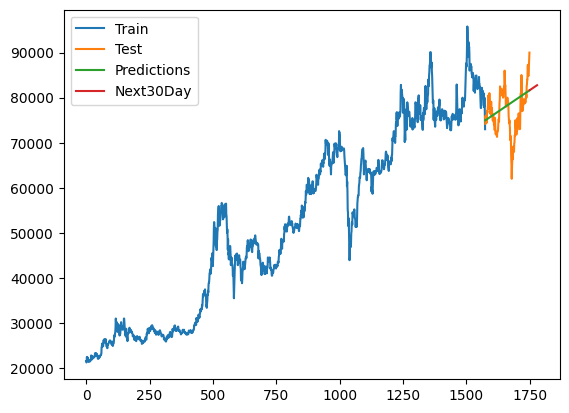

In [27]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

# Calculate MAE
mae2 = np.mean(np.abs(y_pred2 - y_test2))
print('Mean Absolute Error (MAE):', mae2)

# Calculate MAPE
mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape2)

# 8.Vẽ hình
plt.plot(train_data2.index, train_data2['Price'])
plt.plot(test_data2.index, test_data2['Price'])
plt.plot(test_data2.index, y_pred2)
plt.plot(last_data2,y_next_30_days2)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()